In [223]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [224]:
df = pd.read_csv('D:/1-learning/python/Criativa/train.csv')
print('The shape is :',df.shape)
df.head(5)

The shape is : (2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


### Understanding the data

In [225]:
# Data about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [226]:
# Descriptive statistics
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


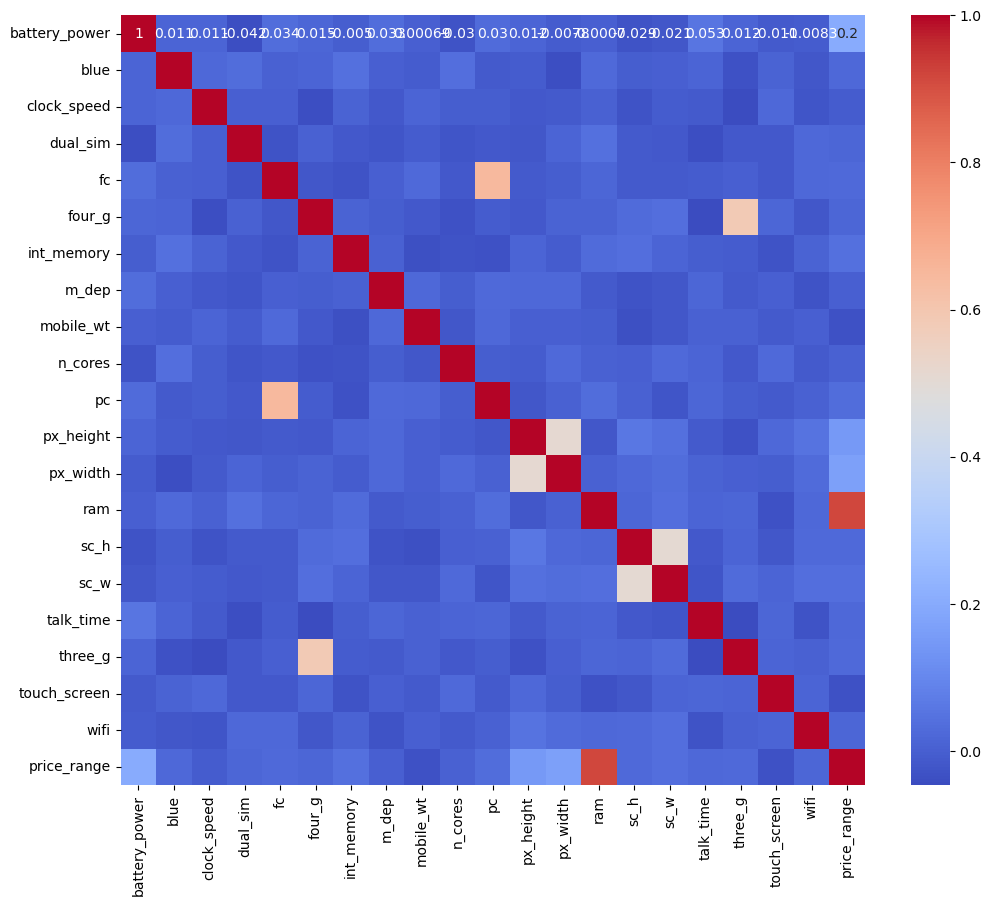

In [227]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [228]:
# finde corelation with price_range
correlation_with_price_range = df.corr()['price_range']
print(correlation_with_price_range.sort_values(ascending=False))


price_range      1.000000
ram              0.917119
battery_power    0.200723
px_width         0.166094
px_height        0.148184
int_memory       0.042589
sc_w             0.038777
pc               0.034639
fc               0.024999
three_g          0.023611
sc_h             0.023300
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.015494
n_cores          0.004598
m_dep           -0.000083
clock_speed     -0.006606
touch_screen    -0.030411
mobile_wt       -0.032457
Name: price_range, dtype: float64


c:\Users\Ayman Rezk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ayman Rezk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ayman Rezk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ayman Rezk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

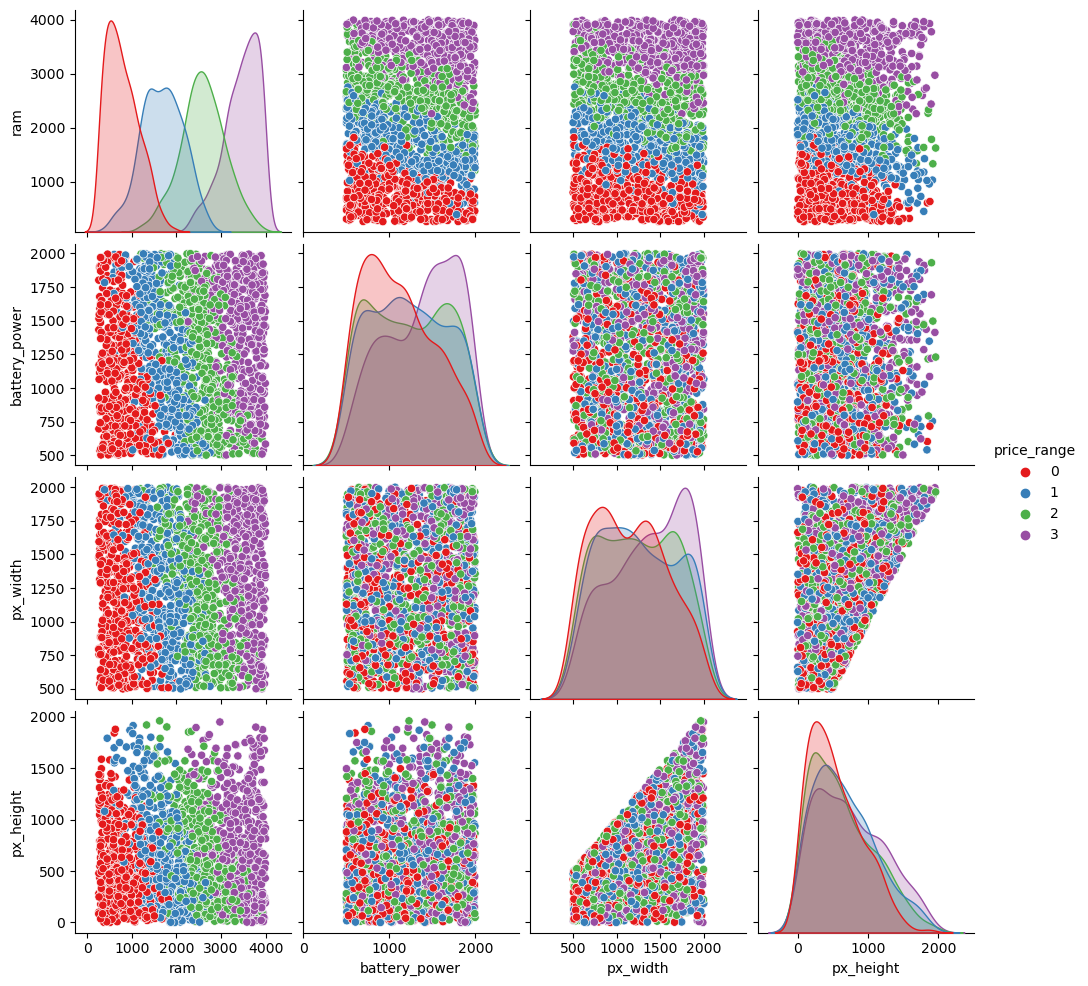

In [229]:
sns.pairplot(df,
            vars=['ram', 'battery_power', 'px_width', 'px_height'],
            hue='price_range',
            palette='Set1')

plt.show()

## Preparing Data

In [230]:
# finde duplicated in data 
df.duplicated().sum()

0

In [231]:
# Feature engineering
# Add a new feature 'screen_size' based on 'px_height' and 'px_width'
df['screen_size'] = np.sqrt(df['px_height'] * df['px_width'])

# Calculate the correlation between 'screen_size' and 'price'
correlation = df['screen_size'].corr(df['price_range'])
print(f"Correlation between 'screen_size' and 'price': {correlation}")

Correlation between 'screen_size' and 'price': 0.16764405793117768


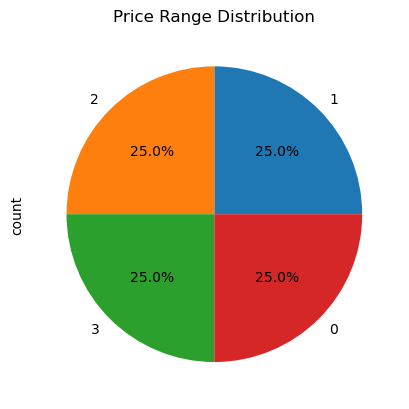

In [232]:
# price_range Beffor dellet null 
ax = df['price_range'].value_counts().plot(kind='pie', autopct='%1.1f%%')
ax.set_title('Price Range Distribution')
plt.show()

In [233]:
# Finde the nan in row 
print(df[df.isna().any(axis=1)])

# drob this nan {0.0045 %} of data
df.dropna(inplace=True)

     battery_power  blue  clock_speed  dual_sim   fc  four_g  int_memory  \
157           1224     0          0.5         0  NaN     NaN         NaN   
158           1356     0          2.8         0  NaN     NaN         NaN   
217           1336     0          0.9         0  5.0     1.0        17.0   
261            728     0          2.7         1  NaN     NaN         NaN   
276           1662     0          0.5         0  NaN     NaN         NaN   
292           1995     1          1.9         0  6.0     0.0         9.0   
293           1517     0          0.5         0  6.0     1.0        48.0   
341            811     1          2.4         1  5.0     1.0         2.0   
371           1011     0          1.1         0  NaN     NaN         NaN   

     m_dep  mobile_wt  n_cores  ...  px_width     ram  sc_h  sc_w  talk_time  \
157    NaN        NaN      NaN  ...     826.0   506.0  10.0   0.0         11   
158    NaN        NaN      NaN  ...    1983.0  3702.0  17.0   0.0         19   

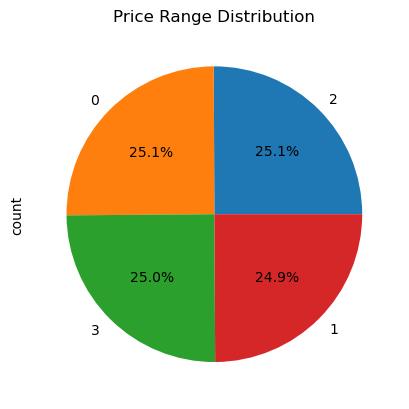

In [234]:
# Change after dellet null
ax = df['price_range'].value_counts().plot(kind='pie', autopct='%1.1f%%')
ax.set_title('Price Range Distribution')
plt.show()

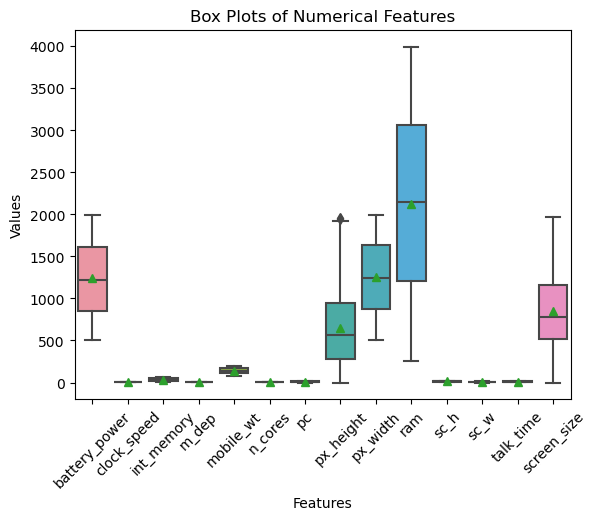

In [235]:
# Select numerical features
numerical_features = ['battery_power', 'clock_speed', 'int_memory', 'm_dep', 'mobile_wt', 
                    'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 
                    'talk_time','screen_size']

# Create box plots using seaborn
sns.boxplot(data=df[numerical_features], orient='v', showmeans=True)
plt.title('Box Plots of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [236]:
# make normalita
data = df

# Select the features you want to normalize
features_to_normalize = ['battery_power', 'clock_speed', 'int_memory', 'm_dep', 'mobile_wt', 
                        'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 
                        'talk_time', 'screen_size']

# 1. Min-Max Scaling
min_max_scaler = MinMaxScaler()
data[features_to_normalize] = min_max_scaler.fit_transform(data[features_to_normalize])

# 2. Z-Score Standardization
standard_scaler = StandardScaler()
data[features_to_normalize] = standard_scaler.fit_transform(data[features_to_normalize])

print(data.head())

   battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0      -0.901577     0     0.831049         0   1.0     0.0   -1.382754   
1      -0.494324     1    -1.254089         1   0.0     1.0    1.153971   
2      -1.536345     1    -1.254089         1   2.0     1.0    0.492216   
3      -1.418037     1     1.199014         0   0.0     0.0   -1.217315   
4       1.325799     1    -0.395503         0  13.0     1.0    0.657655   

      m_dep  mobile_wt   n_cores  ...  px_width       ram      sc_h      sc_w  \
0  0.339599   1.348883 -1.098504  ... -1.146588  0.392123 -0.785347  0.281321   
1  0.686160  -0.120463 -0.661953  ...  1.706476  0.467715  1.113987 -0.636892   
2  1.379283   0.133847  0.211150  ...  1.076579  0.441903 -0.310514 -0.866445   
3  1.032721  -0.261747  0.647701  ...  1.238685  0.594930  0.876570  0.510874   
4  0.339599   0.020820 -1.098504  ... -0.090584 -0.656938 -1.022764 -0.866445   

   talk_time  three_g  touch_screen  wifi  price_range  screen

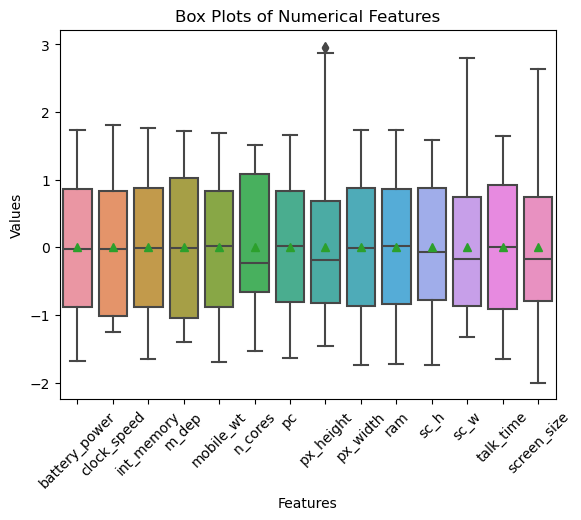

In [237]:

# Select numerical features
numerical_features = ['battery_power', 'clock_speed', 'int_memory', 'm_dep', 'mobile_wt', 
                    'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 
                    'talk_time', 'screen_size']

# Create box plots using seaborn
sns.boxplot(data=data[numerical_features], orient='v', showmeans=True)
plt.title('Box Plots of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [238]:
# dellet tne [sc_h]
FEATURES = ['ram','battery_power', 'px_width','px_height', 'sc_w', 'blue',  "screen_size"]

TARGET = 'price_range'

# Split the data into features (X) and target variable (y)
X = data[FEATURES]  # Assuming 'price_range' is your target variable
y = data[TARGET]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model

## Model_Decision Trees

In [239]:
model_2 = DecisionTreeClassifier(random_state=42)

model_2.fit(X_train, y_train)

y_pred = model_2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8596491228070176


cross-validation

In [240]:
scores = cross_val_score(model_2, data[FEATURES], data[TARGET], cv=5)
print(f"Average Accuracy (Cross-Validation): {scores.mean()}")

Average Accuracy (Cross-Validation): 0.8648946486820066


## Model_Random Forest

In [241]:
model_3 = RandomForestClassifier(random_state=42)

model_3.fit(X_train, y_train)

y_pred = model_3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.924812030075188


cross-validation

In [242]:
scores = cross_val_score(model_3, data[FEATURES], data[TARGET], cv=5)
print(f"Average Accuracy (Cross-Validation): {scores.mean()}")

Average Accuracy (Cross-Validation): 0.9070817747887305


## Model_xgboost ##

In [243]:
model_1 = XGBClassifier(objective='multi:softprob', random_state=42)  # Objective for multi-class classification
model_1.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = model_1.predict(X_test)

# 6. Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.9348370927318296


cross-validation

In [244]:
cv_scores = cross_val_score(model_1, X, y, cv=5, scoring='accuracy')
print(f'Mean cross-validation accuracy: {cv_scores.mean()}')

Mean cross-validation accuracy: 0.922648329366129
